<a href="https://colab.research.google.com/github/dhdmsdud/TIL/blob/master/%ED%95%99%EC%8A%B5%EB%AA%A8%EB%8D%B8%EA%B0%9C%EC%84%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from tensorflow.keras.datasets   import boston_housing
from tensorflow.keras.models     import Sequential 
from tensorflow.keras.layers     import Activation , Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD , Adam
from tensorflow.keras.utils      import plot_model, to_categorical 
from tensorflow.keras.callbacks  import EarlyStopping, ModelCheckpoint


from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


from sklearn.model_selection     import train_test_split
from sklearn.preprocessing       import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.datasets            import load_breast_cancer
from sklearn.model_selection     import KFold
from sklearn.ensemble            import VotingClassifier
from sklearn.metrics             import accuracy_score


import matplotlib.pyplot as plt

import pandas  as pd
import numpy   as np
import seaborn as sns

- Weight initialization
- Activation function
- Optimizer

In [6]:
from tensorflow.keras.datasets.mnist import load_data

In [7]:
(X_train, y_train), (X_test, y_test) = load_data()
X_train.shape, y_train.shape,X_test.shape, y_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
X_train[0].shape

(28, 28)

target --> 5


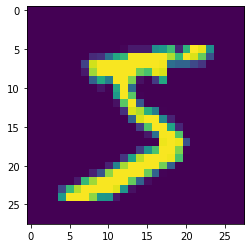

In [9]:
plt.imshow(X_train[0])
print('target -->', y_train[0])

In [10]:
# 1차원으로 reshape
X_train = X_train.reshape(60000, 28*28)
X_test  = X_test.reshape(10000, 784)

In [11]:
X_train[0].shape

(784,)

In [12]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.7, random_state=100)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((18000, 784), (18000, 10), (10000, 784), (10000, 10))

In [16]:
def get_model() :

    model = Sequential()
    model.add(Dense(50, activation='sigmoid',input_shape=(784,)))

    model.add(Dense(50, activation='sigmoid'))
    model.add(Dense(50 ,activation='sigmoid'))
    model.add(Dense(50 ,activation='sigmoid'))

    model.add(Dense(10 ,activation='softmax'))

    return model

In [17]:
model = get_model()

optimizer = SGD(learning_rate=0.01)

model.compile(optimizer = optimizer,
              loss      = 'categorical_crossentropy',
              metrics   = ['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(X_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

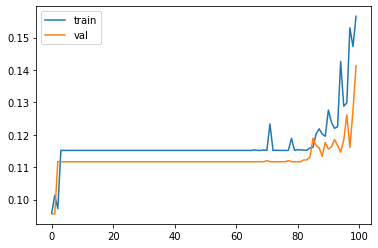

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')
plt.show()

In [22]:
result = model.evaluate(X_test, y_test)
print('test accuracy', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 2.2557 - accuracy: 0.1462
test accuracy 0.1462000012397766


### Resnet --> he_normal
- 가중치를 초기화함

In [23]:
def improve_get_model() :

    model = Sequential()
    model.add(Dense(50, activation='sigmoid',input_shape=(784,) ,kernel_initializer='he_normal'))

    model.add(Dense(50, activation='sigmoid',kernel_initializer='he_normal'))
    model.add(Dense(50 ,activation='sigmoid',kernel_initializer='he_normal'))
    model.add(Dense(50 ,activation='sigmoid',kernel_initializer='he_normal'))

    model.add(Dense(10 ,activation='softmax'))

    return model

In [24]:
model = improve_get_model()

optimizer = SGD(learning_rate=0.01)

model.compile(optimizer = optimizer,
              loss      = 'categorical_crossentropy',
              metrics   = ['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(X_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

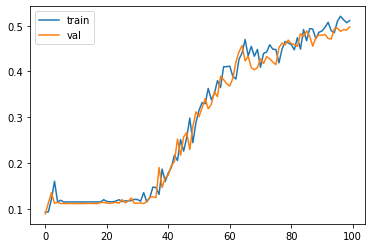

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')
plt.show()

In [28]:
result = model.evaluate(X_test, y_test)
print('test accuracy', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.7823 - accuracy: 0.5168
test accuracy 0.5167999863624573


### relu

In [29]:
def improve_activation_get_model() :

    model = Sequential()
    model.add(Dense(50, activation='relu',input_shape=(784,)))

    model.add(Dense(50, activation='relu'))
    model.add(Dense(50 ,activation='relu'))
    model.add(Dense(50 ,activation='relu'))

    model.add(Dense(10 ,activation='softmax'))

    return model

In [30]:
model = improve_activation_get_model()

optimizer = SGD(learning_rate=0.01)

model.compile(optimizer = optimizer,
              loss      = 'categorical_crossentropy',
              metrics   = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

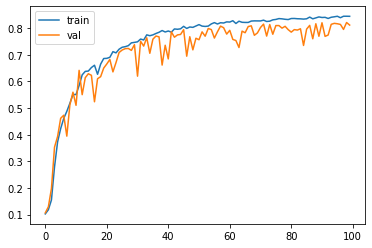

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')
plt.show()

In [33]:
result = model.evaluate(X_test, y_test)
print('test accuracy', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.6472 - accuracy: 0.8197
test accuracy 0.8197000026702881


### Adam

In [34]:
def improve_optimizer_get_model() :

    model = Sequential()
    model.add(Dense(50, activation='sigmoid',input_shape=(784,)))

    model.add(Dense(50, activation='sigmoid'))
    model.add(Dense(50 ,activation='sigmoid'))
    model.add(Dense(50 ,activation='sigmoid'))

    model.add(Dense(10 ,activation='softmax'))

    return model

In [35]:
model = improve_optimizer_get_model()

optimizer = Adam(learning_rate=0.01)

model.compile(optimizer = optimizer,
              loss      = 'categorical_crossentropy',
              metrics   = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

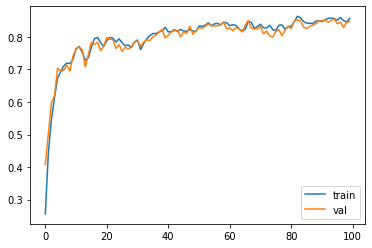

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')
plt.show()

In [38]:
result = model.evaluate(X_test, y_test)
print('test accuracy', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.4637 - accuracy: 0.8539
test accuracy 0.8539000153541565


### 배치 정규화
- 평균 : 0, 분산 : 1인 정규화를 통해 학습이 잘 알어나도록 도와주는 방식
- 각 피쳐마다 배치정규화 진행

In [39]:
def normalization_get_model() :

    model = Sequential()
    model.add(Dense(50, input_shape=(784,)))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=0.01)

    model.compile(optimizer = optimizer,
              loss      = 'categorical_crossentropy',
              metrics   = ['accuracy'])

    return model

In [ ]:
model = normalization_get_model()
model.summary()

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1)

In [42]:
result = model.evaluate(X_test, y_test)
print('test accuracy', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.2180 - accuracy: 0.9633
test accuracy 0.9632999897003174


### dropout, earlystopping

In [43]:
def dropout_get_model() :

    model = Sequential()
    model.add(Dense(50, input_shape=(784,)))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=0.01)

    model.compile(optimizer = optimizer,
              loss      = 'categorical_crossentropy',
              metrics   = ['accuracy'])

    return model

In [44]:
model = dropout_get_model()

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1)

In [46]:
result = model.evaluate(X_test, y_test)
print('test accuracy', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.0644 - accuracy: 0.6367
test accuracy 0.6366999745368958


In [47]:
def dropout_batch_get_model() :

    model = Sequential()
    model.add(Dense(50, input_shape=(784,)))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=0.01)

    model.compile(optimizer = optimizer,
              loss      = 'categorical_crossentropy',
              metrics   = ['accuracy'])

    return model

In [48]:
model = dropout_batch_get_model()

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1)

In [50]:
result = model.evaluate(X_test, y_test)
print('test accuracy', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1490 - accuracy: 0.9602
test accuracy 0.9602000117301941


In [51]:
def dropout_early_get_model() :

    model = Sequential()
    model.add(Dense(50, input_shape=(784,)))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=0.01)

    model.compile(optimizer = optimizer,
              loss      = 'categorical_crossentropy',
              metrics   = ['accuracy'])

    return model

In [52]:
model = dropout_early_get_model()

In [ ]:
callbacks = [EarlyStopping(monitor='val_accuracy', patience=3)]
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1, callbacks=callbacks)

### Ensemble

In [54]:
def get_model() :

    model = Sequential()
    model.add(Dense(50, activation='sigmoid',input_shape=(784,)))

    model.add(Dense(50, activation='sigmoid'))
    model.add(Dense(50 ,activation='sigmoid'))
    model.add(Dense(50 ,activation='sigmoid'))

    model.add(Dense(10 ,activation='softmax'))
    
    optimizer = SGD(learning_rate=0.01)

    model.compile(optimizer = optimizer,
              loss      = 'categorical_crossentropy',
              metrics   = ['accuracy'])

    return model

In [58]:
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

In [59]:
model01 = KerasClassifier(build_fn=get_model, epochs=100, verbose=0)
model02 = KerasClassifier(build_fn=get_model, epochs=100, verbose=0)
model03 = KerasClassifier(build_fn=get_model, epochs=100, verbose=0)

model01._estimator_type = 'classifier'
model02._estimator_type = 'classifier'
model03._estimator_type = 'classifier'

In [60]:
ensemble_model = VotingClassifier(estimators=[('model01', model01), ('model02', model02), ('model03', model03)], voting='soft')
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)

print('test acc : ', accuracy_score(y_pred, y_test))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


test acc :  0.8958
